<a href="https://colab.research.google.com/github/GRUPPE-BINA24/Datenspeicher/blob/main/Versuch_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering durchschnittliche Mietpreise/m2 nach Kantone (k-Means)

Clustering der durchschnittlichen Mietpreise/m2 nach Kanton mittels k-Means.


*   Welche Kantone ähneln sich im Mietpreisniveau?





In [85]:
#Setup installations
!pip install scikit-learn-extra

In [86]:
#Load Libraries

from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


# from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [87]:
#Upload Data

df = pd.read_excel('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx')

df.head()


,Kanton,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Aargau,15.9,15.8,15.7,15.5,15.6,15.1,15.1,15.0,15.5,15.5,15.2
1,Appenzell A.Rh.,13.8,14.0,13.9,13.4,12.8,12.8,12.6,13.0,13.1,12.9,12.9
2,Appenzell I.Rh.,15.9,15.2,14.0,15.7,14.4,15.0,13.2,12.9,14.1,13.7,13.9
3,Basel-Landschaft,17.4,17.3,17.2,17.0,16.9,16.7,16.3,16.3,17.0,16.5,16.9
4,Basel-Stadt,18.2,18.0,17.7,17.7,17.4,16.8,16.9,16.4,16.8,16.7,16.6


In [88]:
#Checkin Data Structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Kanton  28 non-null     object 
 1   2022    28 non-null     float64
 2   2021    28 non-null     float64
 3   2020    28 non-null     float64
 4   2019    28 non-null     float64
 5   2018    28 non-null     float64
 6   2017    28 non-null     float64
 7   2016    28 non-null     float64
 8   2015    28 non-null     float64
 9   2014    28 non-null     float64
 10  2013    28 non-null     float64
 11  2012    28 non-null     float64
dtypes: float64(11), object(1)
memory usage: 2.8+ KB


In [89]:
# Making Kantone as İndex
df.index = df.iloc[:,0]

df = df.iloc[:, 1:]

df.head()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
Kanton,,,,,,,,,,,
Aargau,15.9,15.8,15.7,15.5,15.6,15.1,15.1,15.0,15.5,15.5,15.2
Appenzell A.Rh.,13.8,14.0,13.9,13.4,12.8,12.8,12.6,13.0,13.1,12.9,12.9
Appenzell I.Rh.,15.9,15.2,14.0,15.7,14.4,15.0,13.2,12.9,14.1,13.7,13.9
Basel-Landschaft,17.4,17.3,17.2,17.0,16.9,16.7,16.3,16.3,17.0,16.5,16.9
Basel-Stadt,18.2,18.0,17.7,17.7,17.4,16.8,16.9,16.4,16.8,16.7,16.6


In [90]:
#Zeile Zinssatz entfernen
df.drop(index='Zinssatz', inplace=True)
print(df)

                  2022  2021  2020  2019  2018  2017  2016  2015  2014  2013  \
Kanton                                                                         
Aargau            15.9  15.8  15.7  15.5  15.6  15.1  15.1  15.0  15.5  15.5   
Appenzell A.Rh.   13.8  14.0  13.9  13.4  12.8  12.8  12.6  13.0  13.1  12.9   
Appenzell I.Rh.   15.9  15.2  14.0  15.7  14.4  15.0  13.2  12.9  14.1  13.7   
Basel-Landschaft  17.4  17.3  17.2  17.0  16.9  16.7  16.3  16.3  17.0  16.5   
Basel-Stadt       18.2  18.0  17.7  17.7  17.4  16.8  16.9  16.4  16.8  16.7   
Bern              18.2  18.0  17.7  17.7  17.4  16.8  16.9  16.4  16.8  16.7   
Freiburg          15.2  15.2  14.8  14.5  14.7  14.8  14.5  14.2  15.2  14.6   
Genf              20.3  19.7  19.7  19.5  18.9  18.5  18.4  18.1  18.7  18.7   
Glarus            14.0  13.9  14.0  13.0  13.1  12.7  13.6  11.8  12.9  13.1   
Graubünden        15.8  15.7  15.4  15.8  15.6  15.3  15.3  15.2  15.4  16.1   
Jura              12.2  12.2  11.0  11.5

In [91]:
# Check for NULL values
df.isnull().sum()

2022    0
2021    0
2020    0
2019    0
2018    0
2017    0
2016    0
2015    0
2014    0
2013    0
2012    0
dtype: int64

In [92]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

# Clusterzuordnung für jede Zeile erhalten
df_analyse = df
clusters = kmeans.predict(df)

# Clusterzuordnung dem DataFrame hinzufügen
df['Cluster'] = clusters

# Ergebnis anzeigen
print(df)

                  2022  2021  2020  2019  2018  2017  2016  2015  2014  2013  \
Kanton                                                                         
Aargau            15.9  15.8  15.7  15.5  15.6  15.1  15.1  15.0  15.5  15.5   
Appenzell A.Rh.   13.8  14.0  13.9  13.4  12.8  12.8  12.6  13.0  13.1  12.9   
Appenzell I.Rh.   15.9  15.2  14.0  15.7  14.4  15.0  13.2  12.9  14.1  13.7   
Basel-Landschaft  17.4  17.3  17.2  17.0  16.9  16.7  16.3  16.3  17.0  16.5   
Basel-Stadt       18.2  18.0  17.7  17.7  17.4  16.8  16.9  16.4  16.8  16.7   
Bern              18.2  18.0  17.7  17.7  17.4  16.8  16.9  16.4  16.8  16.7   
Freiburg          15.2  15.2  14.8  14.5  14.7  14.8  14.5  14.2  15.2  14.6   
Genf              20.3  19.7  19.7  19.5  18.9  18.5  18.4  18.1  18.7  18.7   
Glarus            14.0  13.9  14.0  13.0  13.1  12.7  13.6  11.8  12.9  13.1   
Graubünden        15.8  15.7  15.4  15.8  15.6  15.3  15.3  15.2  15.4  16.1   
Jura              12.2  12.2  11.0  11.5

#Time Similarity & Clustering Mietpreis durchschnittlicher Mietpreis pro m2 (Euclidean Distance & k-Means)

Welche Linienverläufe der Kantone sind identisch?


In [93]:
#Importieren der Bibliotheken

import pandas as pd
import numpy as np

In [94]:
#Import der Daten

#Upload Data

df = pd.read_excel('https://raw.githubusercontent.com/GRUPPE-BINA24/Datenspeicher/main/Mietpreis_BERR-Zins.xlsx')

df.head()


,Kanton,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Aargau,15.9,15.8,15.7,15.5,15.6,15.1,15.1,15.0,15.5,15.5,15.2
1,Appenzell A.Rh.,13.8,14.0,13.9,13.4,12.8,12.8,12.6,13.0,13.1,12.9,12.9
2,Appenzell I.Rh.,15.9,15.2,14.0,15.7,14.4,15.0,13.2,12.9,14.1,13.7,13.9
3,Basel-Landschaft,17.4,17.3,17.2,17.0,16.9,16.7,16.3,16.3,17.0,16.5,16.9
4,Basel-Stadt,18.2,18.0,17.7,17.7,17.4,16.8,16.9,16.4,16.8,16.7,16.6


In [95]:
# Making Kantone as İndex
df.index = df.iloc[:,0]

df = df.iloc[:, 1:]

df.head()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
Kanton,,,,,,,,,,,
Aargau,15.9,15.8,15.7,15.5,15.6,15.1,15.1,15.0,15.5,15.5,15.2
Appenzell A.Rh.,13.8,14.0,13.9,13.4,12.8,12.8,12.6,13.0,13.1,12.9,12.9
Appenzell I.Rh.,15.9,15.2,14.0,15.7,14.4,15.0,13.2,12.9,14.1,13.7,13.9
Basel-Landschaft,17.4,17.3,17.2,17.0,16.9,16.7,16.3,16.3,17.0,16.5,16.9
Basel-Stadt,18.2,18.0,17.7,17.7,17.4,16.8,16.9,16.4,16.8,16.7,16.6


In [96]:
#Zeile Zinssatz entfernen
df.drop(index='Zinssatz', inplace=True)
print(df)

                  2022  2021  2020  2019  2018  2017  2016  2015  2014  2013  \
Kanton                                                                         
Aargau            15.9  15.8  15.7  15.5  15.6  15.1  15.1  15.0  15.5  15.5   
Appenzell A.Rh.   13.8  14.0  13.9  13.4  12.8  12.8  12.6  13.0  13.1  12.9   
Appenzell I.Rh.   15.9  15.2  14.0  15.7  14.4  15.0  13.2  12.9  14.1  13.7   
Basel-Landschaft  17.4  17.3  17.2  17.0  16.9  16.7  16.3  16.3  17.0  16.5   
Basel-Stadt       18.2  18.0  17.7  17.7  17.4  16.8  16.9  16.4  16.8  16.7   
Bern              18.2  18.0  17.7  17.7  17.4  16.8  16.9  16.4  16.8  16.7   
Freiburg          15.2  15.2  14.8  14.5  14.7  14.8  14.5  14.2  15.2  14.6   
Genf              20.3  19.7  19.7  19.5  18.9  18.5  18.4  18.1  18.7  18.7   
Glarus            14.0  13.9  14.0  13.0  13.1  12.7  13.6  11.8  12.9  13.1   
Graubünden        15.8  15.7  15.4  15.8  15.6  15.3  15.3  15.2  15.4  16.1   
Jura              12.2  12.2  11.0  11.5

In [97]:
# Funktion zur Berechnung der Euclidean Distance
def euclidean_distance(row):
    return np.sqrt(np.sum(np.square(row - row.shift(1))))

# Berechnung der Euclidean Distance für jede Zeile (Kanton)
df['Euclidean_Distance'] = df.apply(euclidean_distance, axis=1)

print(df[['Euclidean_Distance']])

                  Euclidean_Distance
Kanton                              
Aargau                      0.818535
Appenzell A.Rh.             0.953939
Appenzell I.Rh.             3.440930
Basel-Landschaft            1.081665
Basel-Stadt                 1.009950
Bern                        1.009950
Freiburg                    1.356466
Genf                        1.191638
Glarus                      2.641969
Graubünden                  0.969536
Jura                        2.304344
Luzern                      0.655744
Neuenburg                   1.236932
Nidwalden                   2.628688
Obwalden                    2.338803
Schaffhausen                1.746425
Schweiz                     0.824621
Schwyz                      1.389244
Solothurn                   1.044031
St.Gallen                   1.300000
Tessin                      0.848528
Thurgau                     0.900000
Uri                         2.461707
Waadt                       1.337909
Wallis                      1.382027
Z

In [98]:
from sklearn.cluster import KMeans

# Annahme: df ist dein DataFrame mit der Spalte 'Euclidean_Distance'

# Extrahiere die Euclidean_Distance-Werte als Features für das Clustering
X = df[['Euclidean_Distance']]

# Definiere die Anzahl der Cluster (hier 4)
num_clusters = 4

# Definiere und trainiere den k-means-Algorithmus
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Füge die zugehörigen Cluster-Zuordnungen zum DataFrame hinzu
df['Cluster'] = kmeans.labels_

# Ausgabe der geclusterten Daten
print(df)

                  2022  2021  2020  2019  2018  2017  2016  2015  2014  2013  \
Kanton                                                                         
Aargau            15.9  15.8  15.7  15.5  15.6  15.1  15.1  15.0  15.5  15.5   
Appenzell A.Rh.   13.8  14.0  13.9  13.4  12.8  12.8  12.6  13.0  13.1  12.9   
Appenzell I.Rh.   15.9  15.2  14.0  15.7  14.4  15.0  13.2  12.9  14.1  13.7   
Basel-Landschaft  17.4  17.3  17.2  17.0  16.9  16.7  16.3  16.3  17.0  16.5   
Basel-Stadt       18.2  18.0  17.7  17.7  17.4  16.8  16.9  16.4  16.8  16.7   
Bern              18.2  18.0  17.7  17.7  17.4  16.8  16.9  16.4  16.8  16.7   
Freiburg          15.2  15.2  14.8  14.5  14.7  14.8  14.5  14.2  15.2  14.6   
Genf              20.3  19.7  19.7  19.5  18.9  18.5  18.4  18.1  18.7  18.7   
Glarus            14.0  13.9  14.0  13.0  13.1  12.7  13.6  11.8  12.9  13.1   
Graubünden        15.8  15.7  15.4  15.8  15.6  15.3  15.3  15.2  15.4  16.1   
Jura              12.2  12.2  11.0  11.5

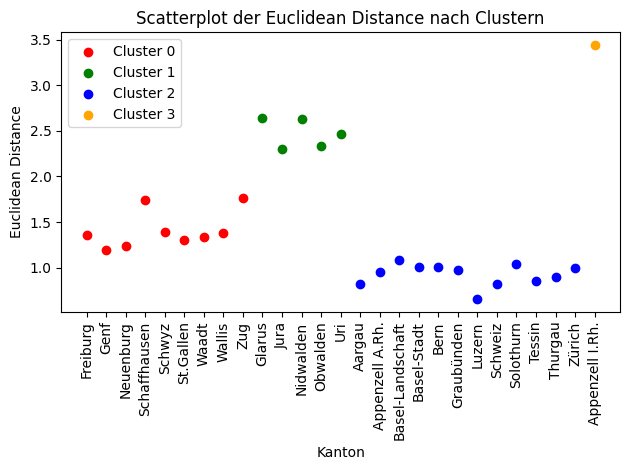

In [99]:
import matplotlib.pyplot as plt

# Annahme: df ist dein DataFrame mit den Spalten 'Euclidean_Distance' und 'Cluster'

# Erstelle eine Liste von Farben für die Scatterplots
colors = ['red', 'green', 'blue', 'orange', 'yellow']

# Erstelle einen Scatterplot für jede Gruppe
for cluster_label, color in zip(range(num_clusters), colors):
    # Filtere den DataFrame nach dem aktuellen Cluster
    cluster_df = df[df['Cluster'] == cluster_label]

    # Erstelle den Scatterplot für die Werte des aktuellen Clusters
    plt.scatter(cluster_df.index, cluster_df['Euclidean_Distance'], color=color, label=f'Cluster {cluster_label}')

# Plot-Einstellungen
plt.xlabel('Kanton')
plt.ylabel('Euclidean Distance')
plt.title('Scatterplot der Euclidean Distance nach Clustern')
plt.legend()
plt.xticks(rotation=90)  # Rotiere die Kanton-Namen für bessere Lesbarkeit
plt.tight_layout()

# Zeige den Plot an
plt.show()